# Proyecto 11, Aprendizaje Automático en Negocios

## 1 Introducción

La ciencia de datos, combinada con el aprendizaje automático, está transformando el panorama empresarial al permitir que las organizaciones tomen decisiones más informadas y estratégicas. La ciencia de datos consiste en la recopilación, procesamiento, análisis e interpretación de grandes volúmenes de datos. Al aplicarse en el contexto de negocios, esta disciplina ayuda a descubrir patrones ocultos, generar predicciones y optimizar procesos.

El aprendizaje automático, como una rama de la inteligencia artificial, utiliza algoritmos y modelos matemáticos para analizar datos históricos y realizar predicciones. En el ámbito empresarial, el aprendizaje automático permite automatizar tareas, personalizar la experiencia del cliente, gestionar inventarios con mayor precisión y realizar análisis predictivos que identifican tendencias futuras. Esta capacidad predictiva es fundamental en áreas como ventas, marketing, finanzas y recursos humanos, ya que permite anticiparse a la demanda, reducir costos y maximizar el retorno sobre la inversión (ROI).

En conjunto, la ciencia de datos y el aprendizaje automático en los negocios brindan ventajas competitivas al mejorar la toma de decisiones basadas en datos y al generar soluciones innovadoras que resuelven problemas complejos. Empresas de todos los tamaños están adoptando estas tecnologías para adaptarse a un entorno dinámico, potenciando la personalización y optimización en sus operaciones diarias.

## 2 Descripcion

<b>Proyecto de Selección de Ubicaciones para Nuevos Pozos Petrolíferos en OilyGiant</b>

Este proyecto se centra en la identificación estratégica de las ubicaciones más rentables para abrir 200 nuevos pozos de petróleo en OilyGiant, una compañía líder en la extracción de petróleo. La tarea consiste en analizar los datos recolectados de pozos existentes en tres regiones, con el fin de construir un modelo predictivo que facilite la selección de las mejores ubicaciones para maximizar el rendimiento de la inversión.

## 3 Objetivo

1.	Procesar y analizar los parámetros de los pozos en las regiones seleccionadas, específicamente la calidad del crudo y el volumen de reservas.
2.	Construir un modelo de aprendizaje automático que pueda predecir el volumen de reservas en los nuevos pozos, basándose en los datos históricos.
3.	Seleccionar los pozos con los valores estimados más altos en términos de volumen de reservas, asegurando una rentabilidad óptima.
4.	Identificar la región con el beneficio total proyectado más alto para los pozos seleccionados.

# 4 Importación y Preparación de Datos

Para comenzar el análisis, primero se importan los archivos de datos que contienen EL identificador único de pozo de petróleo, identificador único de pozo de petróleo, volumen de reservas. La importación se realiza mediante herramientas como pandas, que permite cargar los datos en un formato tabular (DataFrame) adecuado para su procesamiento.

Una vez importados, se procede a la limpieza de los datos para asegurar su calidad. Esta etapa incluye la eliminación o imputación de valores faltantes, la corrección de datos atípicos y la verificación de consistencia en los tipos de datos. Posteriormente, se realiza una transformación y normalización de las variables necesarias para que el modelo predictivo pueda procesarlas de manera óptima.

Con los datos limpios y preparados, están listos para ser utilizados en el modelado y análisis posterior, asegurando así que los resultados del proyecto sean precisos y confiables.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importaremos las librerias
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
import math as mt
from scipy.stats import ttest_ind
from scipy.stats import levene
from sklearn import set_config
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, precision_score, recall_score, mean_squared_error





In [4]:
#cargamos los datos y les hechamos un vistazo.
region_1= pd.read_csv('/content/drive/MyDrive/Datos para proyectos/rentabilidad-petrolera-ml/geo_data_0.csv')
region_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
#cargamos los datos 2 y les hechamos un vistazo.
region_2= pd.read_csv('/content/drive/MyDrive/Datos para proyectos/rentabilidad-petrolera-ml/geo_data_1.csv')
region_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
#cargamos los datos 3 y les hechamos un vistazo.
region_3= pd.read_csv('/content/drive/MyDrive/Datos para proyectos/rentabilidad-petrolera-ml/geo_data_2.csv')
region_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [8]:
#Analicemos como vienen los datos.
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
#Analicemos como vienen los datos 2.
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
#Analicemos como vienen los datos 3.
region_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
#Aseguremos que no vengan datos ausentes
region_1.isna().sum()

,0
id,0
f0,0
f1,0
f2,0
product,0


In [12]:
region_2.isna().sum()

,0
id,0
f0,0
f1,0
f2,0
product,0


In [13]:
region_3.isna().sum()

,0
id,0
f0,0
f1,0
f2,0
product,0


In [15]:
#Ahora chequemos si existen datos duplicados
print("Datos 1:",region_1.duplicated().sum())
print("Datos 2:",region_2.duplicated().sum())
print("Datos 3:",region_3.duplicated().sum())

Datos 1: 0
Datos 2: 0
Datos 3: 0


In [16]:
#Aseguremos que las columnas queden de excelente manera
column_new=[]
for old_name in region_1.columns:
    name_strip=old_name.strip()
    name_lower=name_strip.lower()
    name_space=name_lower.replace(" ","_")
    column_new.append(name_space)


region_1.columns=column_new

region_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [17]:
#Aseguremos que las columnas queden de excelente manera
column_new=[]
for old_name in region_2.columns:
    name_strip=old_name.strip()
    name_lower=name_strip.lower()
    name_space=name_lower.replace(" ","_")
    column_new.append(name_space)


region_2.columns=column_new

region_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [18]:
#Aseguremos que las columnas queden de excelente manera
column_new=[]
for old_name in region_3.columns:
    name_strip=old_name.strip()
    name_lower=name_strip.lower()
    name_space=name_lower.replace(" ","_")
    column_new.append(name_space)


region_3.columns=column_new

region_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


### 4.1. Conclusión

La etapa de preparación de datos ha permitido transformar un conjunto de datos crudos en un recurso estructurado y confiable para el análisis. La limpieza y preprocesamiento han comprobado valores faltantes, corregido inconsistencias y normalizado las variables clave, garantizando la calidad necesaria para construir un modelo predictivo robusto. Con los datos listos, estamos en una posición óptima para proceder con el modelado y análisis, acercándonos a la selección precisa de las ubicaciones más rentables para los nuevos pozos de petróleo en las regiones evaluadas. Esta base sólida es esencial para generar conclusiones confiables y respaldar decisiones estratégicas.

## 5. Desarrollo

El desarrollo de este proyecto se centra en comprender a fondo qué nos revelan los datos sobre el potencial de extracción de petróleo en distintas regiones.

In [19]:
#Analizar las caracteristicas f-0, 1, 2 mediante histogramas
columns = ['f0', 'f1', 'f2', 'product']

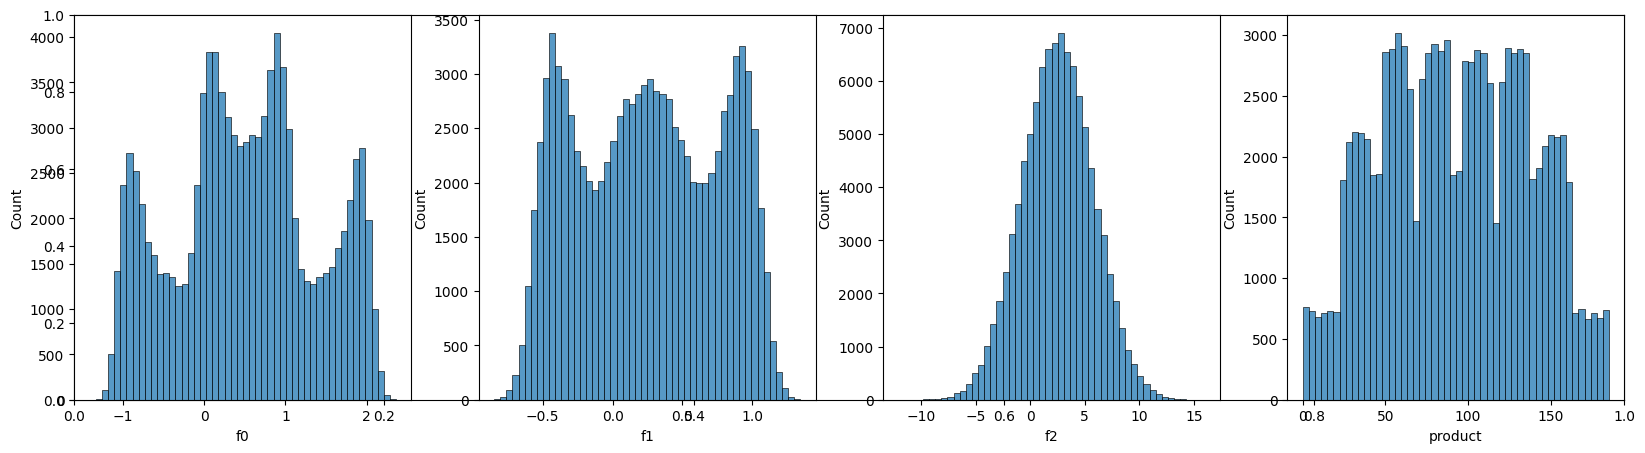

In [20]:
#region_1
plt.subplots(figsize = (20,5))

for indice, columna in enumerate(columns):
    grafico = sns.histplot(data = region_1, x =columna, bins= 50, ax = plt.subplot(1, len(columns), indice+1) )

Podemos ver que el F2 tiene un comportamiento normal, los otros se ven que tienen una especie de valle, el del producto se ve un poco más distribuido.

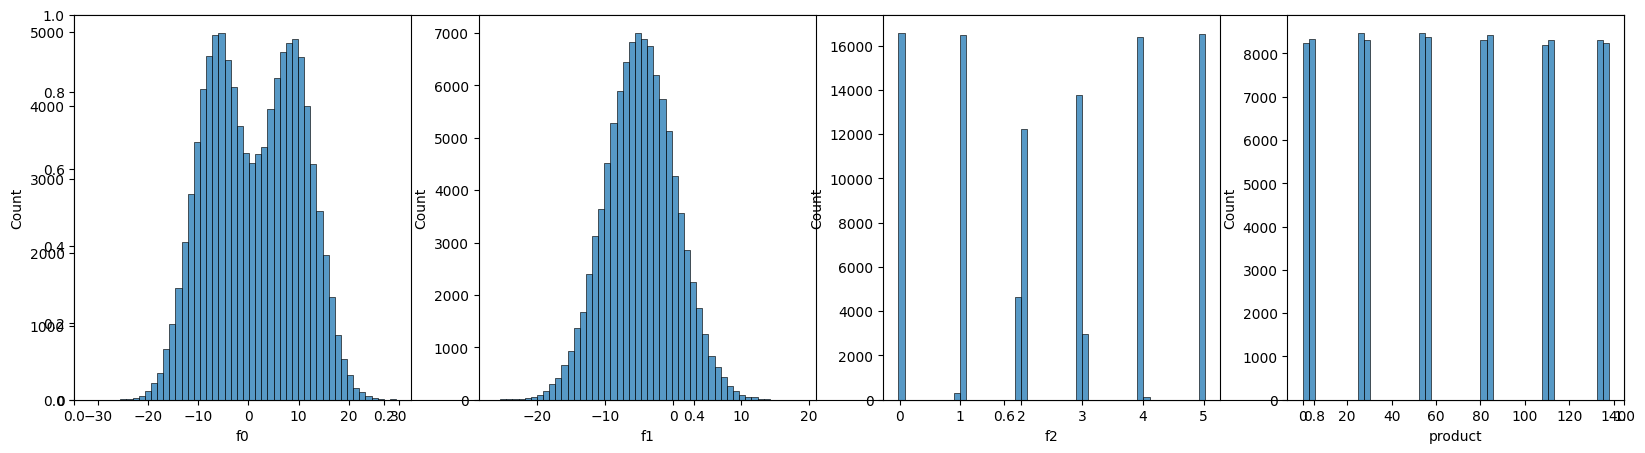

In [21]:
#region_2
plt.subplots(figsize = (20,5))

for indice, columna in enumerate(columns):
    grafico = sns.histplot(data = region_2, x =columna, bins= 50, ax = plt.subplot(1, len(columns), indice+1) )

Podemos ver que el f1 se ve con una distribución normal y el f2 y producto se ven que son como números exactos no hay tanta distribución

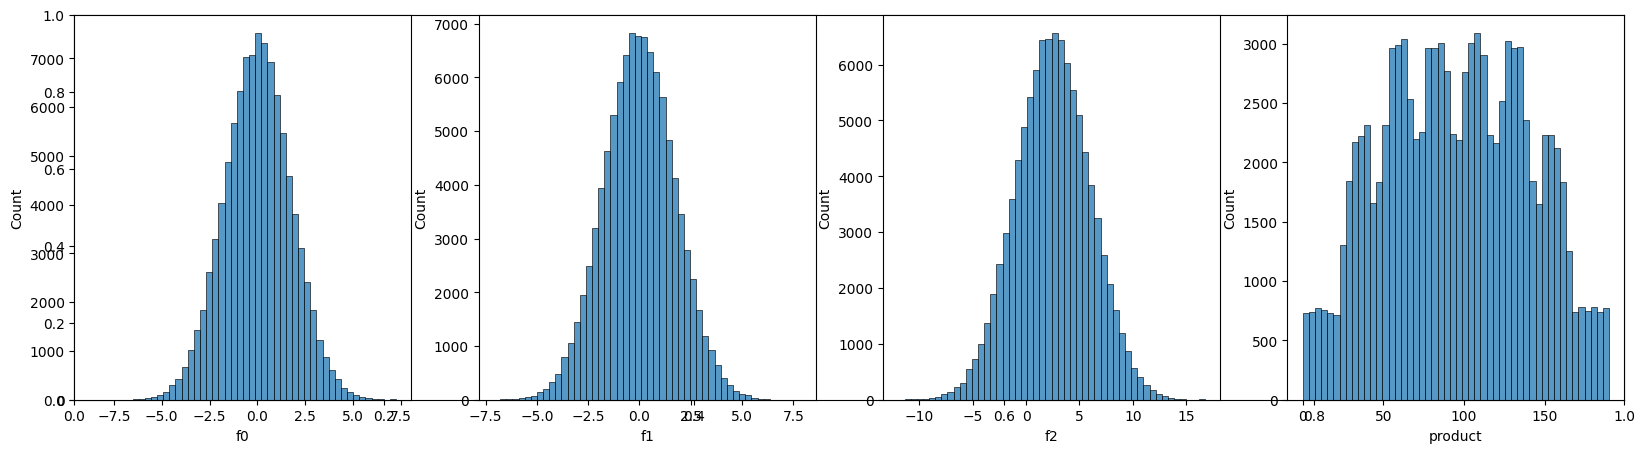

In [22]:
#region_3
plt.subplots(figsize = (20,5))

for indice, columna in enumerate(columns):
    grafico = sns.histplot(data = region_3, x =columna, bins= 50, ax = plt.subplot(1, len(columns), indice+1) )

podemos observar que f0 a f2 son normales tienen su comportamiento normal, el producto tiene una distribución diferente.

Scatter Region 1


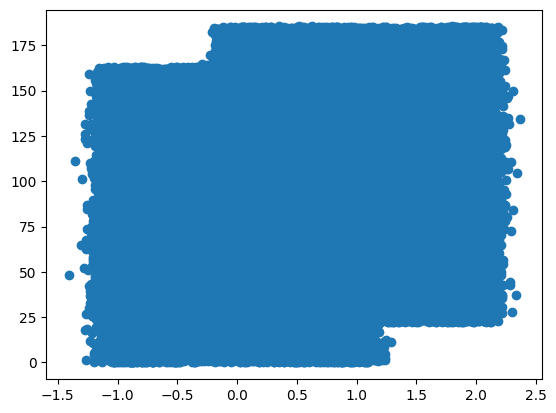

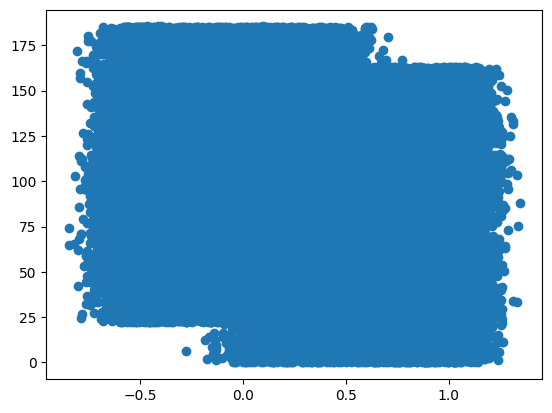

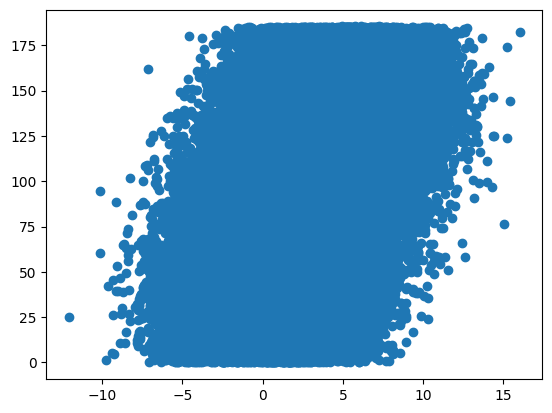

In [23]:
#Diagrama de disperción

print('Scatter Region 1')

fig, ax= plt.subplots()
ax.scatter(region_1['f0'], region_1['product'])

fig, ax= plt.subplots()
ax.scatter(region_1['f1'], region_1['product'])

fig, ax= plt.subplots()
ax.scatter(region_1['f2'], region_1['product'])

In [24]:
region_1[['f0', 'f1', 'f2', 'product']].corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


Scatter Region 2


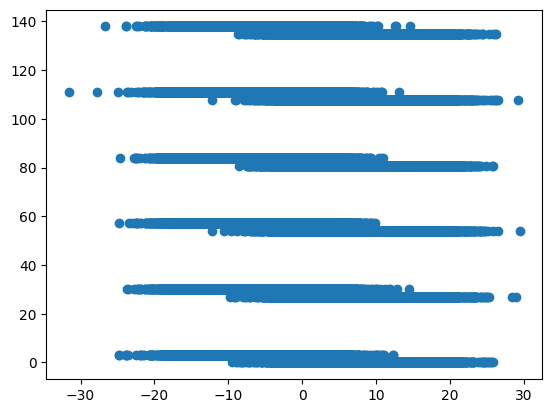

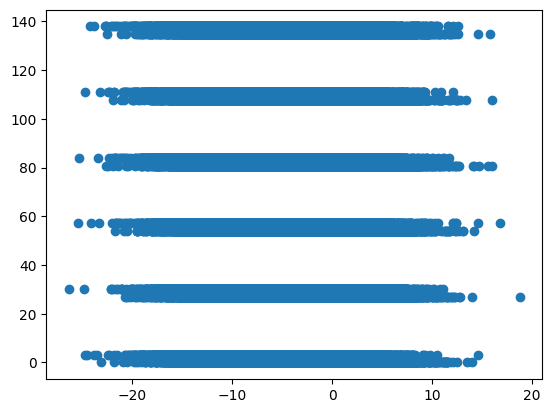

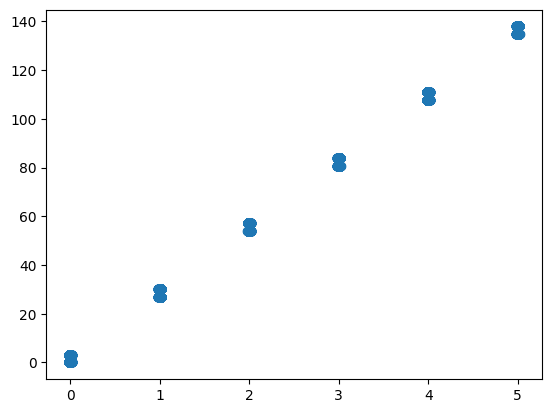

In [25]:
print('Scatter Region 2')

fig, ax= plt.subplots()
ax.scatter(region_2['f0'], region_2['product'])

fig, ax= plt.subplots()
ax.scatter(region_2['f1'], region_2['product'])

fig, ax= plt.subplots()
ax.scatter(region_2['f2'], region_2['product'])

In [26]:
region_2[['f0', 'f1', 'f2', 'product']].corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


Scatter Region 3


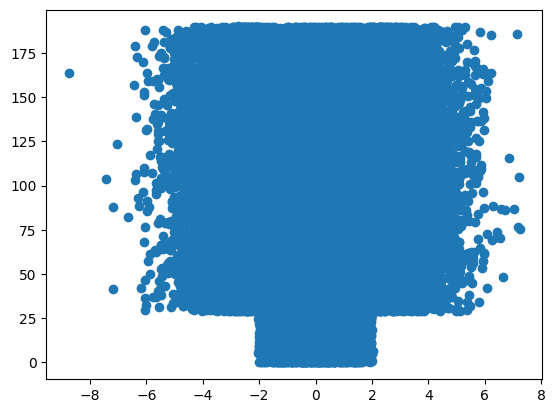

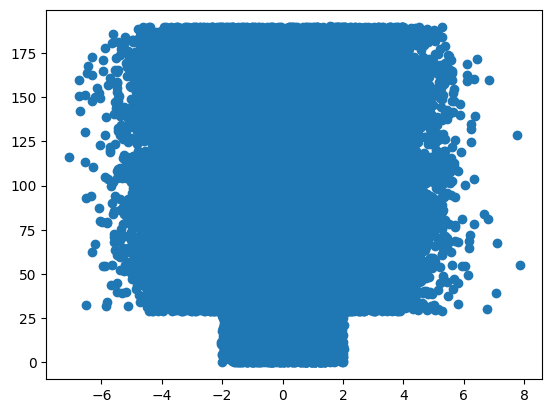

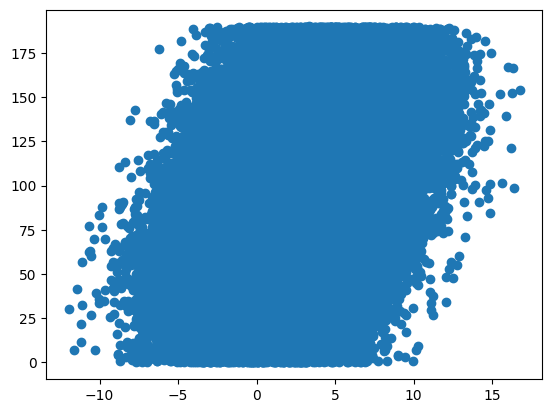

In [27]:
print('Scatter Region 3')

fig, ax= plt.subplots()
ax.scatter(region_3['f0'], region_3['product'])

fig, ax= plt.subplots()
ax.scatter(region_3['f1'], region_3['product'])

fig, ax= plt.subplots()
ax.scatter(region_3['f2'], region_3['product'])

In [28]:
region_3[['f0', 'f1', 'f2', 'product']].corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Lo que nos permite ver estos gráficos, es ver si tiene una correlación. para ver si tienen un efecto en nuestro objetivo, ósea si es un buen predictor. para ver si debemos tomar en cuenta o no en el modelo.

In [29]:
#creemos el modelo
estado_actual = np.random.RandomState(54321)

In [39]:

def entrenamiento(data, random_state = estado_actual):
    caracteristicas = data.drop(columns=['product', 'id'], axis=1)
    meta = data['product']
    caracteristicas_entrenamiento, caracteristicas_validacion, objetivo_entrenamiento, objetivo_validacion = train_test_split(caracteristicas, meta, test_size = 0.25, random_state= estado_actual)
    rl = LinearRegression()
    rl.fit(caracteristicas_entrenamiento, objetivo_entrenamiento)
    prediccion= rl.predict(caracteristicas_validacion)
    rmse = np.sqrt(mean_squared_error(objetivo_validacion, prediccion))
    promedio_prediccion = prediccion.mean()
    print('RMSE', rmse)
    print('Volumen Promedio', promedio_prediccion)
    #Sacamos un valor promedio por barril deacuerdo a internet
    print('Precio total promedio: ', promedio_prediccion*70.79*1000)
    print()
    return pd.DataFrame(dict(predicted_value=prediccion, real_value=objetivo_validacion))

In [40]:
regiones = ['Region 1', 'Region 2', 'Region 3']

datas = [region_1, region_2, region_3]

predicciones={}


In [41]:
for data, region in zip(datas,regiones):
    predicciones[region] = entrenamiento(data)


RMSE 37.828054194058865
Volumen Promedio 92.54347378351981
Precio total promedio:  6551152.509135368

RMSE 0.8914163865375113
Volumen Promedio 69.1753243321653
Precio total promedio:  4896921.209473982

RMSE 39.817824719448154
Volumen Promedio 94.85076780205323
Precio total promedio:  6714485.852707349



In [42]:
print(predicciones['Region 1'])

       predicted_value  real_value
22111       115.427928   84.554116
45173        84.270188  126.322591
99924        79.046902  105.436458
22202        62.327578   37.545972
61276       104.907424  112.600782
...                ...         ...
27536        72.395865   97.692185
4097        101.598541   84.586256
55464        86.677294  112.840776
96830       108.396844   48.153943
81541        56.038453   53.893426

[25000 rows x 2 columns]


In [43]:
print(predicciones['Region 2'])

       predicted_value  real_value
45175       109.908094  110.992147
66251       110.431969  110.992147
85945        56.945755   57.085625
10746         2.971225    3.179103
4006          1.484320    0.000000
...                ...         ...
14306       110.557734  110.992147
23423       135.404431  134.766305
39858       135.192437  134.766305
18284        27.721676   26.953261
48202       138.976434  137.945408

[25000 rows x 2 columns]


In [44]:
print(predicciones['Region 3'])

       predicted_value  real_value
52878       132.248719  113.332153
67022       112.272653  159.431594
99506        76.664956   80.731937
93567       127.279859  131.622034
86632        72.905470  101.699029
...                ...         ...
58418        74.497224   27.991768
10701       123.013063  141.313232
36226       109.252901   28.235802
54633       116.227158  137.318108
29419        97.826644   82.904525

[25000 rows x 2 columns]


Aqui escogemos el que tiene menor error. pero tambien el que tiene mas volumen. tenemos que saber que entre menor error menos ventas y vicebersa entre mas ventas mas error.

In [45]:
# Calcularemos la rentabilidad por region con un ejemplo practico
presupuesto= 100000000
ingreso=4500
pozos=200

In [46]:
volumen_minimo= presupuesto/ingreso
volumen_minimo

22222.222222222223

In [47]:
volumen_minimo_pozos=volumen_minimo/pozos
volumen_minimo_pozos

111.11111111111111

In [48]:

def margen(tabla):
    mejores = tabla.sort_values(by='predicted_value', ascending=False)['real_value'].head(200)
    volumen_mejores = mejores.sum()
    margen = (volumen_mejores*ingreso)-presupuesto
    return margen

In [49]:
print('El beneficio de la Region 1 es ', margen(predicciones["Region 1"]))

print('El beneficio de la Region 2 es ', margen(predicciones["Region 2"]))

print('El beneficio de la Region 3 es ', margen(predicciones["Region 3"]))


El beneficio de la Region 1 es  36687251.59100318
El beneficio de la Region 2 es  24150866.966815114
El beneficio de la Region 3 es  25787507.152304992


In [50]:
state= np.random.RandomState(54321)

In [51]:
def func_estres(datos, n_muestras=1000):
    beneficio_muestra=[]
    for i in range(n_muestras):
        sample= datos.sample(n=500, replace=True, random_state=state)
        beneficio_muestra.append(margen(sample))
    beneficio= pd.Series(beneficio_muestra)
    return beneficio


In [52]:
func_estres(predicciones['Region 1'])

,0
0,6.243577e+06
1,1.193210e+06
2,2.316743e+06
3,8.066115e+06
4,5.233301e+06
...,...
995,2.614996e+06
996,5.125059e+06
997,8.150389e+06
998,1.024939e+06


In [53]:
func_estres(predicciones['Region 2'])

,0
0,8.814876e+06
1,1.552424e+06
2,7.944700e+06
3,3.928457e+06
4,4.913081e+06
...,...
995,4.962840e+06
996,7.177018e+05
997,7.410404e+06
998,5.127048e+06


In [54]:
func_estres(predicciones['Region 3'])

,0
0,1.134776e+05
1,4.773947e+06
2,6.352518e+06
3,6.383029e+06
4,1.534500e+06
...,...
995,6.586426e+06
996,6.945278e+04
997,6.822824e+06
998,5.320569e+06


In [55]:

def calculo_con_confianza(serie_beneficio, region):
    alpha = 0.05  # Nivel de significancia para el intervalo de confianza

    # Calcular el intervalo inferior y superior al nivel de confianza deseado usando percentiles
    intervalo_inferior = np.percentile(serie_beneficio, alpha * 100 / 2)
    intervalo_superior = np.percentile(serie_beneficio, (1 - alpha / 2) * 100)

    # Calcular el promedio del beneficio estresado
    promedio_beneficio = np.mean(serie_beneficio)

    # Calcular las pérdidas (consideraremos la pérdida como el mínimo de la serie de beneficios)
    perdida = np.min(serie_beneficio)

    # Imprimir resultados
    print(f"Región: {region}")
    print(f"Intervalo de confianza al {100 * (1 - alpha)}%: [{intervalo_inferior}, {intervalo_superior}]")
    print(f"Margen promedio de beneficio: {promedio_beneficio}")
    print(f"Pérdida máxima esperada: {perdida}")



In [56]:
calculo_con_confianza(predicciones['Region 1'],"predicted_value")

Región: predicted_value
Intervalo de confianza al 95.0%: [23.833470534216108, 161.97963083860236]
Margen promedio de beneficio: 92.68037640512266
Pérdida máxima esperada: 0.0040215231561772


In [57]:
calculo_con_confianza(predicciones['Region 2'],"predicted_value")

Región: predicted_value
Intervalo de confianza al 95.0%: [0.0, 137.94540774090564]
Margen promedio de beneficio: 69.17233959755212
Pérdida máxima esperada: -2.0042431924416344


In [58]:
calculo_con_confianza(predicciones['Region 3'],"predicted_value")

Región: predicted_value
Intervalo de confianza al 95.0%: [25.338553264361707, 165.4178029217659]
Margen promedio de beneficio: 95.04972679526482
Pérdida máxima esperada: 0.0092041119595402


## 6. Conclusión

La evaluación del riesgo y el beneficio en la Región 1 nos proporciona una base sólida para la toma de decisiones. El análisis del intervalo de confianza y el cálculo del margen promedio de beneficio indican un potencial significativo para generar ganancias en esta región, mientras que la estimación de pérdidas permite anticipar el nivel de riesgo involucrado. Si bien existe una posible pérdida máxima identificada, el intervalo de confianza y el beneficio promedio sugieren que los retornos esperados compensan adecuadamente este riesgo.

Con estos resultados, podemos concluir que la Región 1 representa una inversión favorable para OilyGiant, balanceando de forma efectiva el beneficio potencial con los riesgos, y brindando una proyección confiable para el desarrollo de nuevos pozos.